In [93]:
import pandas as pd
import numpy as np
from sklearn.cluster import *

import matplotlib.pyplot as plt
import seaborn as sns
plt.style.use('ggplot')

%matplotlib inline

RANDOM_STATE = 42

import warnings
warnings.filterwarnings('ignore')

In [94]:
source = 'https://raw.githubusercontent.com/mkleinbort/resource-datasets/master/blobs/'

flame = pd.read_csv(f'{source}/flame.csv')
agg = pd.read_csv(f'{source}/aggregation.csv')
comp = pd.read_csv(f'{source}/compound.csv')
jain = pd.read_csv(f'{source}/jain.csv')
path = pd.read_csv(f'{source}/pathbased.csv')
r15 = pd.read_csv(f'{source}/r15.csv')
spiral = pd.read_csv(f'{source}/spiral.csv')

datasets = [flame, agg, comp, jain, path, r15, spiral]
dataset_names = ['flame', 'agg', 'comp', 'jain', 'path', 'r15', 'spiral']

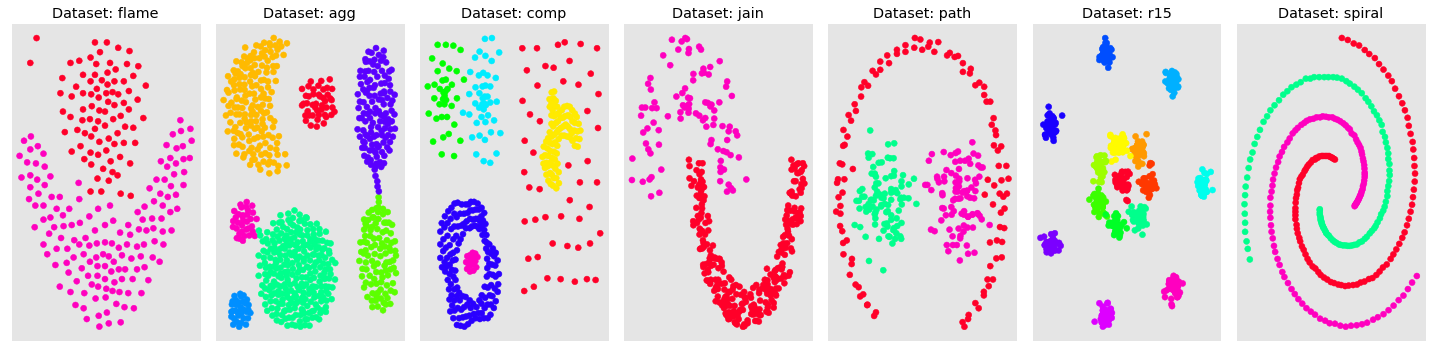

In [95]:
def plot_data(datasets: list, dataset_names: list):
    """
        Plot datasets used for clustering
        
        datasets - list of DataFrames
        dataset_names - list of dataset names
    """
    fig, axis = plt.subplots(1, len(datasets), figsize=(20,5))
    
    for i, ax in enumerate(axis):
        ax.scatter(x=datasets[i]['x'], y=datasets[i]['y'], c=datasets[i]['label'], cmap='gist_rainbow')
        ax.set_title(f'Dataset: {dataset_names[i]}')
        ax.set_yticks([])
        ax.set_xticks([])
        
    plt.tight_layout()

plot_data(datasets, dataset_names)

## Clustering Methods Overview

<table align="left">
  <tr>
    <th>Method</th>
    <th>General Characteristics</th> 
  </tr>
  <tr>
    <td>Partitioning Methods</td>
    <td>
     Find mutually exclusive clusters of spherical shape<br/> 
     Distance-based<br/> 
     May use mean or medoid (etc.) to represent cluster center<br/> 
     Effective for small - to medium-size data sets
    </td>
  </tr>
  <tr>
    <td>Hierarchical Methods</td>
    <td>
      Clustering is a hierarchical decomposition (i.e., multiple levels)<br/> 
      Cannot correct erroneous merges or splits<br/> 
      May incorporate other techniques like microclustering or consider object “linkages”<br/>
      Good for spherical-shaped clusters
    </td>
  </tr>
  <tr>
    <td>Density-based Methods</td>
    <td>
        Can find arbitrarily shaped clusters<br/>
        Clusters are dense regions of objects in space that are separated by low-density regions<br/>
        Cluster density: Each point must have a minimum number of points within its “neighborhood”<br/>
        May filter out outliers
    </td>
  </tr>
  <tr>
    <td>Grid-based Methods</td>
    <td>
        Use a multiresolution grid data structure<br/>
        Fast processing time (typically independent of the number of data objects, yet dependent on grid size)
    </td>
  </tr>
</table>

In [96]:
def plot_cluster(datasets: list, dataset_names: list, algorithm:str):
    """
        Plot datasets used for clustering and clustered labels
        
        datasets - list of DataFrames
        dataset_names - list of dataset names 
        predictions - Series containing the clustering prediction labels
        algorithm  - name of the algorithm
    """
    fig, axis = plt.subplots(1, len(datasets), figsize=(20,5))
    
    for i, ax in enumerate(axis):
        ax.scatter(x=datasets[i]['x'], y=datasets[i]['y'], c=datasets[i][algorithm], cmap='gist_rainbow')
        ax.set_title(f'Dataset: {dataset_names[i]}, {algorithm}')
        ax.set_yticks([])
        ax.set_xticks([])
        
    plt.tight_layout()

## Partitioning Methods

### k-Means: A Centroid-Based Technique
The k-means method aims to minimize the sum of distances between the points and their respective cluster centroid. It is not guaranteed to converge to the global optimum and often terminates at a local optimum. The results may depend on the initial random selection of cluster centers.
</br>

Finding optimal value for the number of clusters can be done via the elbow method (plotting inertia) and/or plotting the dunns index for a range of clusters, additionally the silhouette score
</br>

There are several variants of the k-means method. These can differ in the selection
of the initial k-means, the calculation of dissimilarity, and the strategies for calculating
cluster means.
</br>

k-means++ - It specifies a procedure to initialize the cluster centers before moving forward with the standard k-means clustering algorithm.
</br>

k-medians clustering - uses the median in each dimension instead of the mean
</br>

K-modes -  Cluster nominal data by replacing the means of clusters with modes

#### Evaluation Metrics

Inertia -  inertia calculates the sum of all the points within a cluster from the centroid of that cluster, which is the  intracluster distance and then sums these values. Inertia should be as low as possible.
</br>

Dunn index - the ratio of the minimum of inter-cluster distances and maximum of intracluster distances. the Dunn index  should be maximized 

#### Cluster Comparison

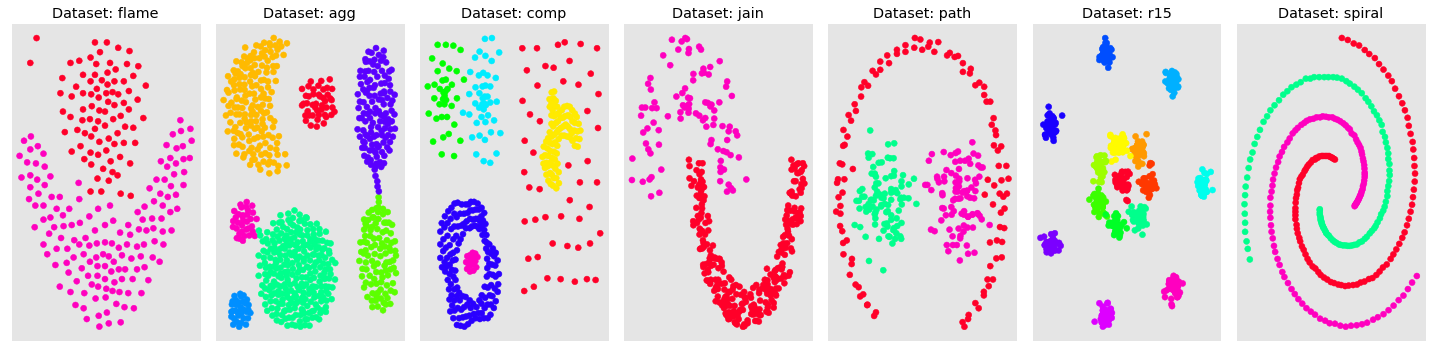

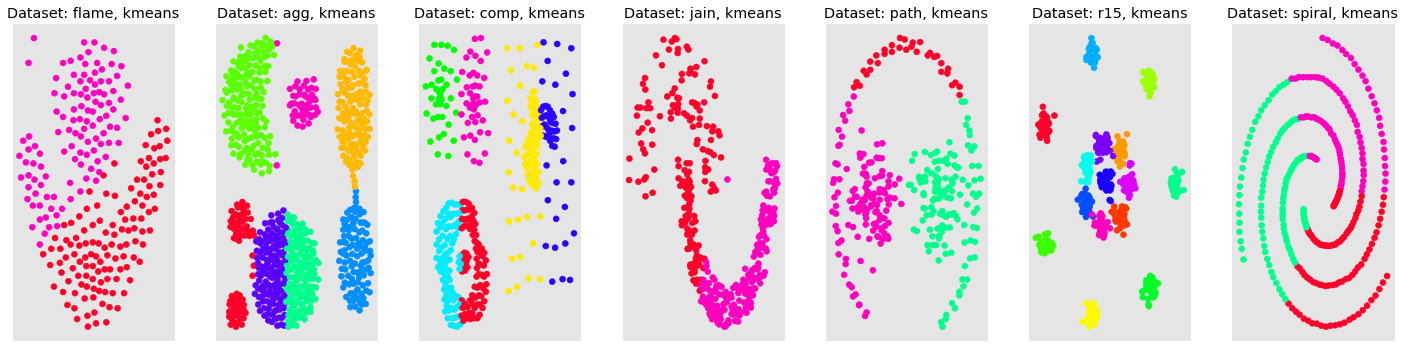

In [97]:
clustersets = datasets.copy()

for cset in clustersets:
    n_clusters = len(set(cset['label']))
    algorithm = KMeans(n_jobs = -1, n_clusters = n_clusters, init='k-means++', RANDOM_STATE=RANDOM_STATE)
    pred_label = algorithm.fit_predict(cset)
    cset['kmeans'] = pd.Series(pred_label)
        
plot_data(datasets, dataset_names)
plot_cluster(clustersets, dataset_names, 'kmeans')

### Elbow Method Example

Text(0.5, 1.0, 'The Elbow Method using Distortion')

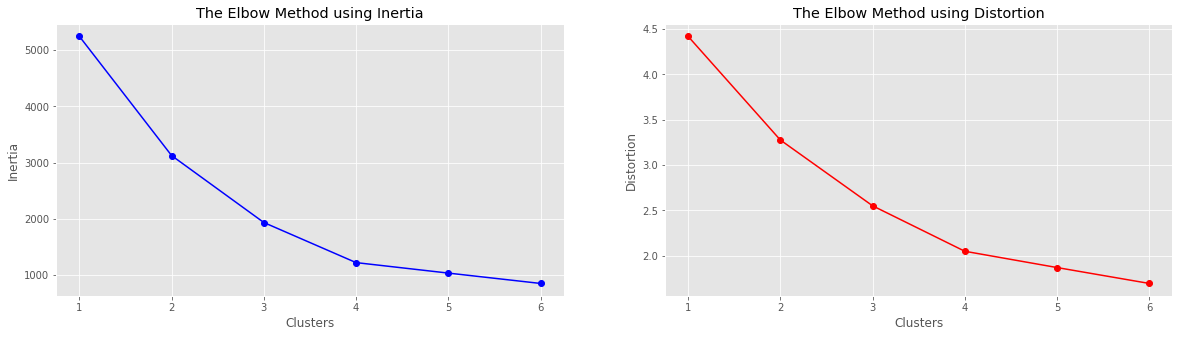

In [98]:
from sklearn import metrics 
from scipy.spatial.distance import cdist 

distortions = [] 
inertias = [] 

n_cluster = len(set(datasets[0]['label']))
cluster_range = range(1, n_cluster+5)
X = datasets[0].drop(columns = ['label'])
 
for cluster in cluster_range: 
    #Building and fitting the model 
    kmeanModel = KMeans(n_jobs = -1, n_clusters=cluster, init='k-means++').fit(X) 
      
    distortions.append(sum(np.min(cdist(X, kmeanModel.cluster_centers_, 
                      'euclidean'),axis=1)) / X.shape[0]) 
    inertias.append(kmeanModel.inertia_)

# Inertia, distortion elbow plots
fig, axis = plt.subplots(1, 2, figsize=(20,5))

#Inertia Plot
axis[0].plot(cluster_range, inertias, 'bo-')
axis[0].set_xlabel('Clusters') 
axis[0].set_ylabel('Inertia') 
axis[0].set_title('The Elbow Method using Inertia')
# Distortion Plot
axis[1].plot(cluster_range, distortions, 'ro-')
axis[1].set_xlabel('Clusters') 
axis[1].set_ylabel('Distortion') 
axis[1].set_title('The Elbow Method using Distortion') 

### k-Medoids: A Representative Object-Based Technique

k-medoids method -groups n objects into k clusters by minimizing the absolute error. It's less sensitive to outliers
</br>

A medoid can be defined as the point in the cluster, whose dissimilarities with all the other points in the cluster is minimum.
</br>

The k-medoids method is more robust than k-means in the presence of noise and outliers because a medoid is less influenced by outliers or other extreme values than a mean.
</br>

When k is a general positive number, the k-medoid problem is NP-hard and does not scale well for large data sets.
</br>

CLARA (Clustering LARge Applications) - CLARANS (Clustering Large Applications based upon RANdomized Search) are implementations that can be used to scale the algorithm to large datsets

In [99]:
from pyclustering.cluster.kmedoids import kmedoids
from pyclustering.cluster.center_initializer import kmeans_plusplus_initializer

for i in range(len(datasets)):
    
    n_cluster = len(set(datasets[i]['label']))
    data = datasets[i][['x','y']].values
    # Initialise medoids
    medoids = kmeans_plusplus_initializer(data, n_cluster).initialize(return_index=True)
    
    # Create instance of K-Medoids algorithm.
    kmedoids_instance = kmedoids(data, medoids)
    # Run cluster analysis and obtain results.
    kmedoids_instance.process()
    clusters = kmedoids_instance.get_clusters()
    
    # Create dataframe output to plot using plot functions
    for j in range(0, len(clusters)):
        if j == 0:
            initial = pd.DataFrame([j]*len(clusters[j]),index=clusters[j], columns=['kmedoids'])
        else:
            initial = pd.concat([initial, pd.DataFrame([j]*len(clusters[j]),index=clusters[j], columns=['kmedoids'])])
    clustersets[i] = pd.merge(clustersets[i], initial, left_index=True, right_index=True)

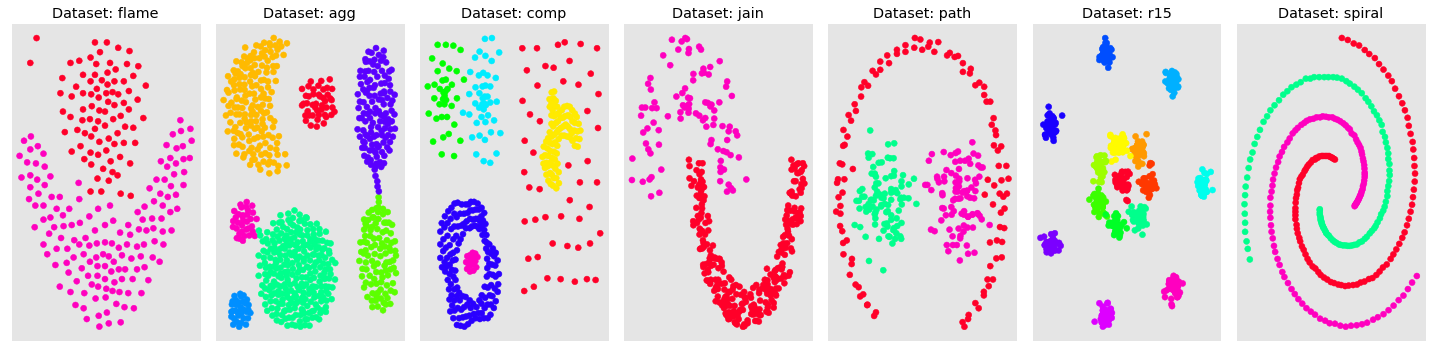

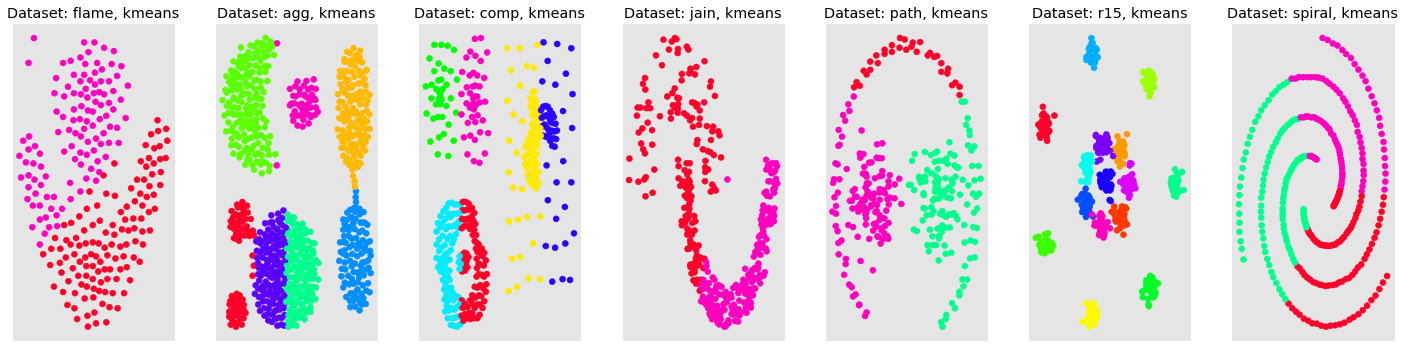

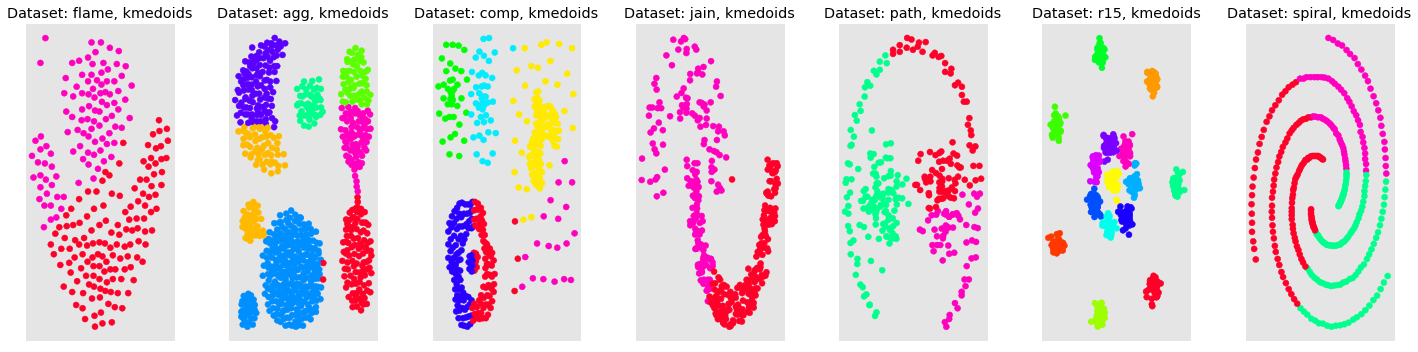

In [100]:
plot_data(datasets, dataset_names)
plot_cluster(clustersets, dataset_names, 'kmeans')
plot_cluster(clustersets, dataset_names, 'kmedoids')

## Hierarchical Methods

Hierachical methods can either be Agglomerative or Divisive
### Agglomerative
Uses a bottom-up strategy. It typically starts by letting each object form its own cluster and iteratively merges clusters
into larger and larger clusters, until all the objects are in a single cluster or certain termination conditions are satisfied.
Worst case is O(nlog(n))
### Divisive
Employs a top-down strategy. It starts by placing all objects in one cluster, which is the hierarchy’s root. It then divides the root cluster into several smaller subclusters, and recursively partitions those clusters into smaller ones.

A challenge with divisive methods is how to partition a large cluster into several
smaller ones. There are 2^(n−1) − 1 possible ways to partition a set of n objects into two exclusive subsets, where n is the number of objects. When n is large, it is computationally prohibitive to examine all possibilities. Consequently, a divisive method typically uses heuristics in partitioning, which can lead to inaccurate results, and so are typically used less.

### Dendrograms
Can be used to visualize the history of groupings and figure out the optimal number of clusters.

<ol>
  <li>Determine the largest vertical distance that doesn’t intersect any of the other clusters</li>
  <li>Draw a horizontal line at both extremities</li>
  <li>The optimal number of clusters is equal to the number of vertical lines going through the horizontal line</li>
</ol>

### Linkage Criteria
How the distance between clusters is calculated. The method used influences strongly influences the results

<table align='Center'>
  <caption>Linkage Criteria</caption>
  <tr>
    <th>Criteria</th>
    <th>Description</th>
  </tr>
  <tr>
    <td>Single Linkage</td>
    <td>The distance between two clusters is the shortest distance between two points in each cluster</td>
  </tr>
  <tr>
    <td>Average Linkage</td>
    <td>The distance between clusters is the average distance between each point in one cluster to every point in other cluster</td>
  </tr>
  <tr>
    <td>Complete Linkage</td>
    <td>The distance between two clusters is the longest distance between two points in each cluster</td>
  </tr>
  <tr>
    <td>Ward Linkage</td>
    <td>The distance between clusters is the sum of squared differences within all clusters</td>
  </tr>
</table>

### Dendrogram Example


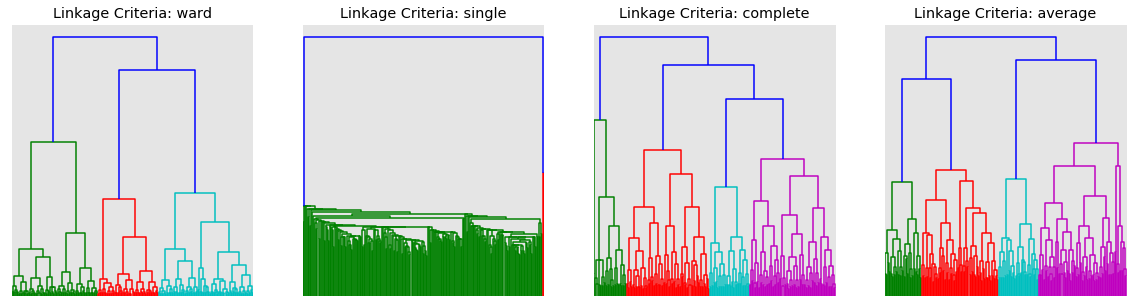

In [101]:
from scipy.cluster.hierarchy import dendrogram, linkage

methods = ['ward','single','complete','average']
X = datasets[0][['x','y']].values

fig, axis = plt.subplots(1, len(methods), figsize=(20,5))

for i, method in enumerate(methods):
    Z = linkage(X, method=method)
    dendrogram(Z, ax=axis[i])
    axis[i].set_title(f'Linkage Criteria: {method}')

#### Cluster Comparison
Using the 4 linkage methods with the estimated number of clusters from the dendograms

In [102]:
from sklearn.cluster import AgglomerativeClustering

for cset in clustersets:
    for method in methods:
        n_clusters = len(set(cset['label']))
        algorithm = AgglomerativeClustering(n_clusters=n_clusters, linkage=method)
        pred_label = algorithm.fit_predict(cset[['x','y']])
        cset[f'{method}'] = pd.Series(pred_label)

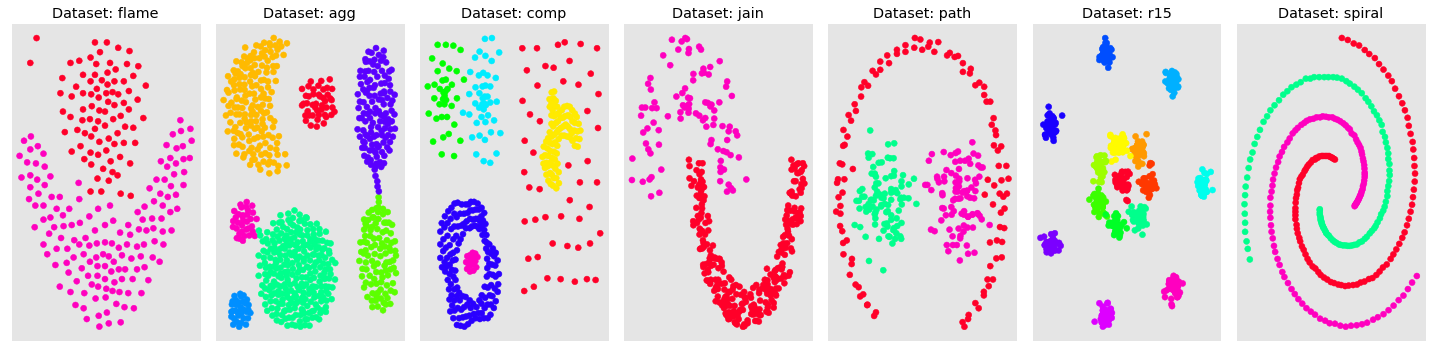

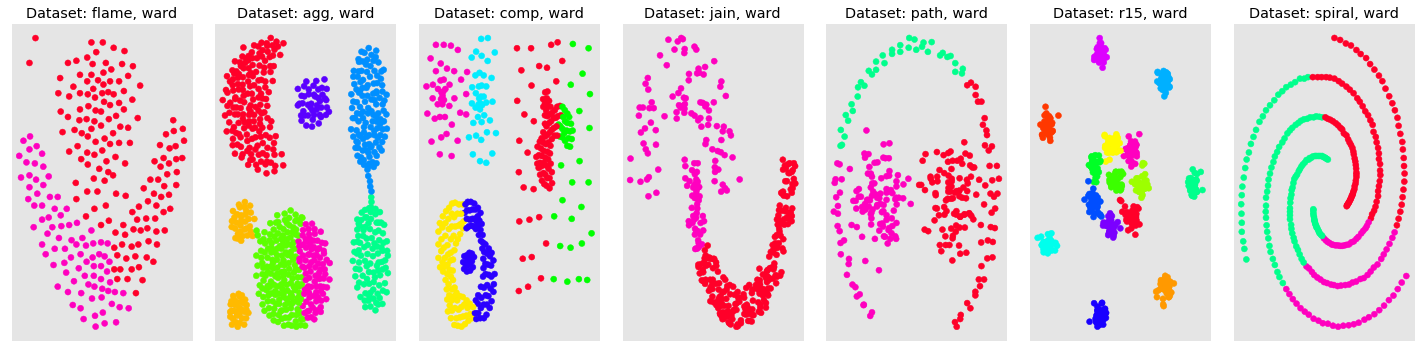

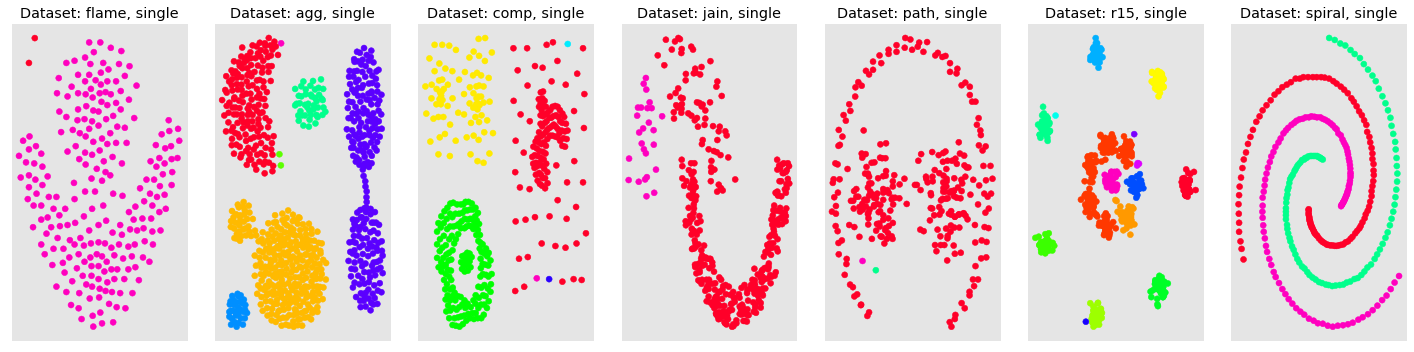

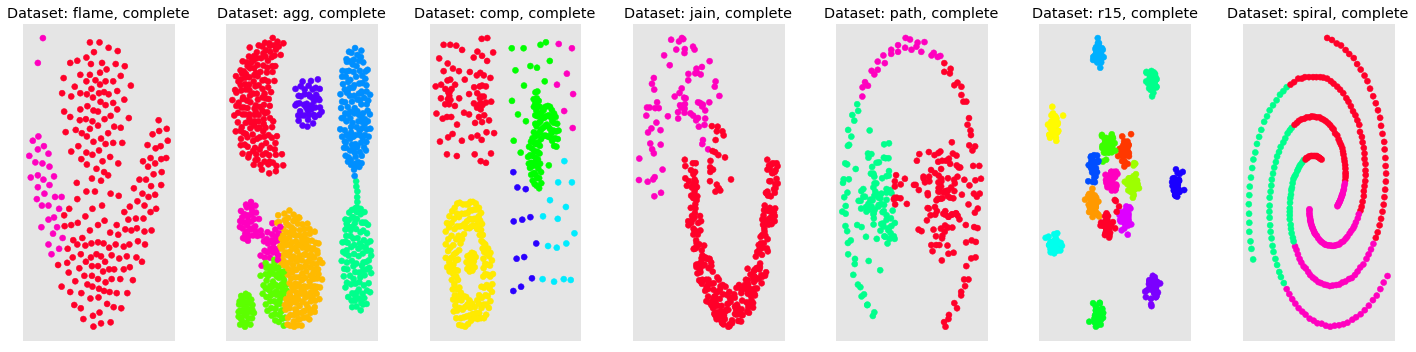

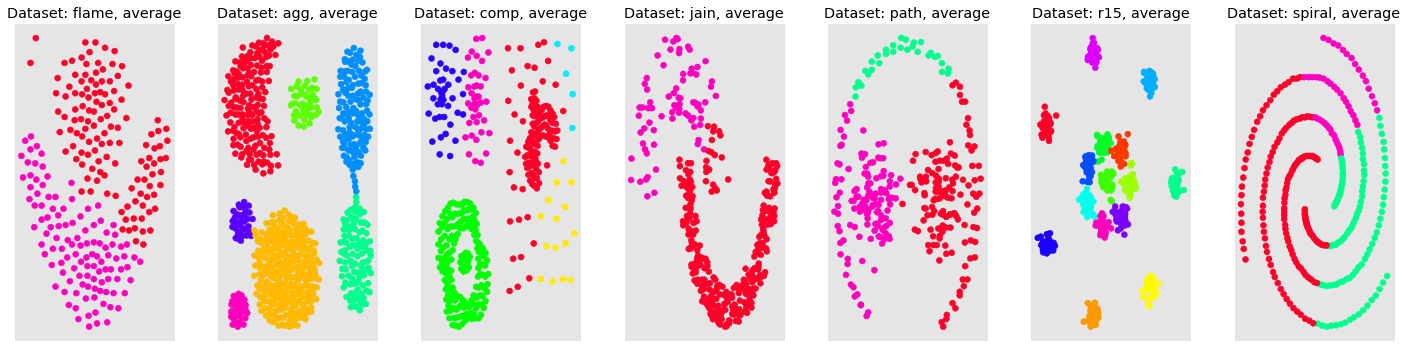

In [103]:
plot_data(datasets, dataset_names)
for method in methods:
    plot_cluster(clustersets, dataset_names, method)

## Multiphase Hierarchical Clustering

Hierachical Clustering designed for larger datasets

### Birch (Balanced Iterative Reducing and Clustering using Hierarchies)
It overcomes the two difficulties in agglomerative clustering methods:
</br>

(1) scalability and (2) the inability to undo what was done in the previous step.

Uses a CF-tree which is a height-balanced tree that stores the clustering features for a hierarchical clustering.
- CF = (n,LS,SS)
- lS - linear sum of the n points
- SS - square sum of n points
</br>

The nonleaf nodes store sums of the CFs of their children, and thus summarize clustering information about their children. A CF-tree has two parameters: branching factor, B, and threshold, T. The branching factor specifies the maximum number of children per nonleaf node. The threshold parameter specifies the maximum diameter of subclusters stored at the leaf nodes of the tree. These two parameters implicitly control the resulting tree’s size.

- Phase 1: BIRCH scans the database to build an initial in-memory CF-tree
- Phase 2: BIRCH applies a (selected) clustering algorithm to cluster the leaf nodes of
the CF-tree, which removes sparse clusters as outliers and groups dense clusters into
larger ones.
</br>

Drawbacks:
- Since every node in a CF tree can grasp only a limited number of records due to the size,
a CF tree node does not constantly resemble to what a user may ruminate a nature cluster.

- Furthermore, if the clusters are not spherical in nature,
it does not execute well because it uses the notion of radius or diameter to regulate the borderline of a cluster/group.

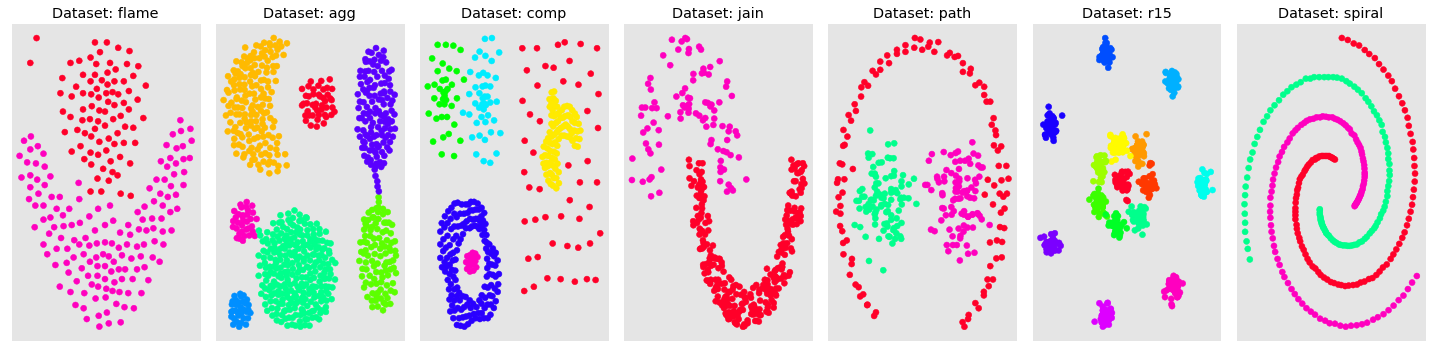

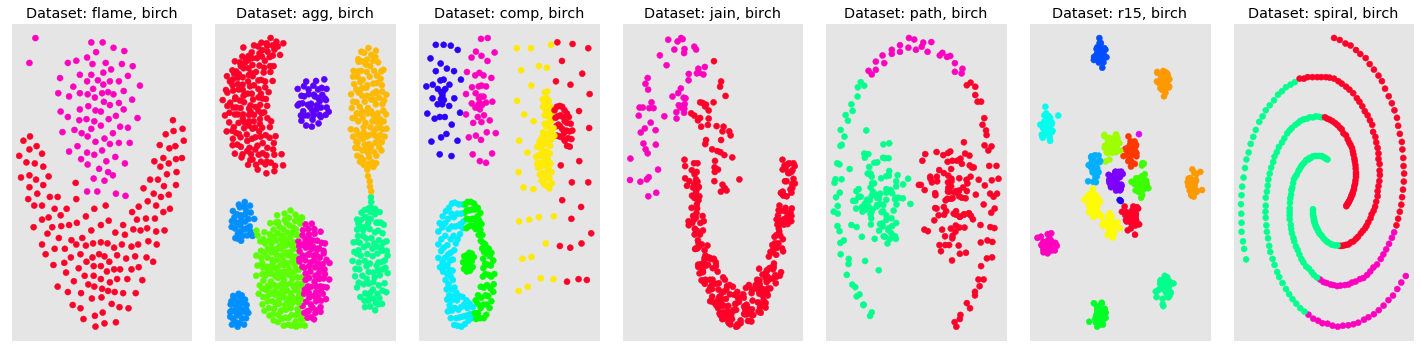

In [104]:
from sklearn.cluster import Birch

#specifying n_clusters with an int fits an AgglomerativeClustering model/ set to None to return subclusters as they are

for cset in clustersets:
    n_clusters = len(set(cset['label']))
    algorithm = Birch(n_clusters=n_clusters, threshold=0.5, branching_factor=50)
    pred_label = algorithm.fit_predict(cset)
    cset['birch'] = pd.Series(pred_label)
    
plot_data(datasets, dataset_names)
plot_cluster(clustersets, dataset_names, 'birch')

## Density-based Methods

### DBSCAN (Density-Based Clustering Based on Connected Regions with High Density)
The density of an object o can be measured by the number of objects close to o. Finds objects that have dense neighborhoods and connect core objects and their neighborhoods to form dense regions as clusters.
</br>

Parameters 
- ε is used to specify the radius of a neighborhood. 
- MinPts specifies the density threshold of dense regions
</br>

The density of a neighborhood can be measured simply by the number of objects in the neighborhood.

Careful consideration of parameters for your dataset needs to be considered

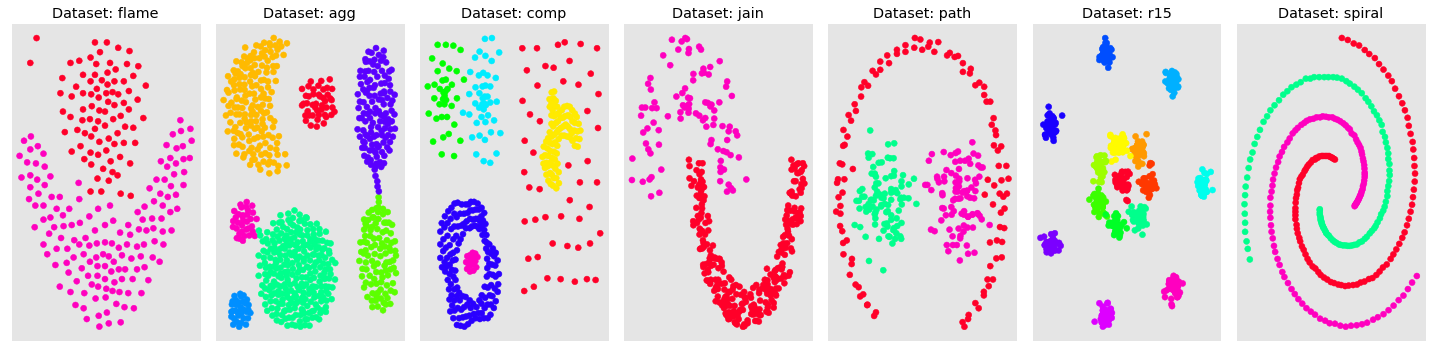

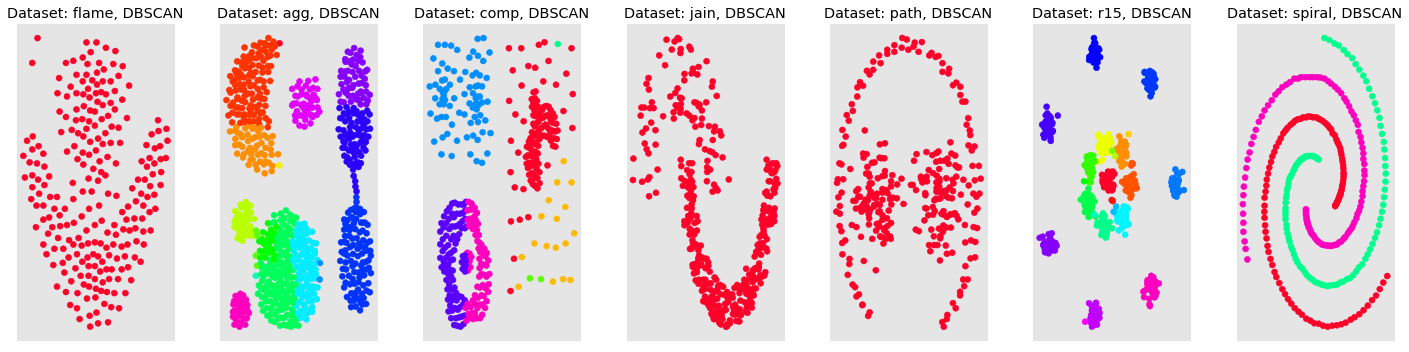

In [105]:
from sklearn.cluster import DBSCAN


for cset in clustersets:
    algorithm = DBSCAN(n_jobs=-1, eps=4, min_samples=1)
    pred_label = algorithm.fit_predict(cset)
    cset['DBSCAN'] = pd.Series(pred_label)
    
plot_data(datasets, dataset_names)
plot_cluster(clustersets, dataset_names, 'DBSCAN')

### OPTICS (Ordering Points to Identify the Clustering Structure)
OPTICS does not explicitly produce a data set clustering. Instead, it outputs a cluster ordering
</br>
The cluster ordering can be used to extract basic clustering information (e.g., cluster centers, or arbitrary-shaped clusters), derive the intrinsic clustering structure, as well as provide a visualization of the clustering.
OPTICS needs 2 parameters
- max_eps - core-distance of an object p is the smallest value such that the neighborhood of p has at least MinPts objects
- min_samples -  reachability-distance to object p from q is the minimum radius value that makes p density-reachable from q.

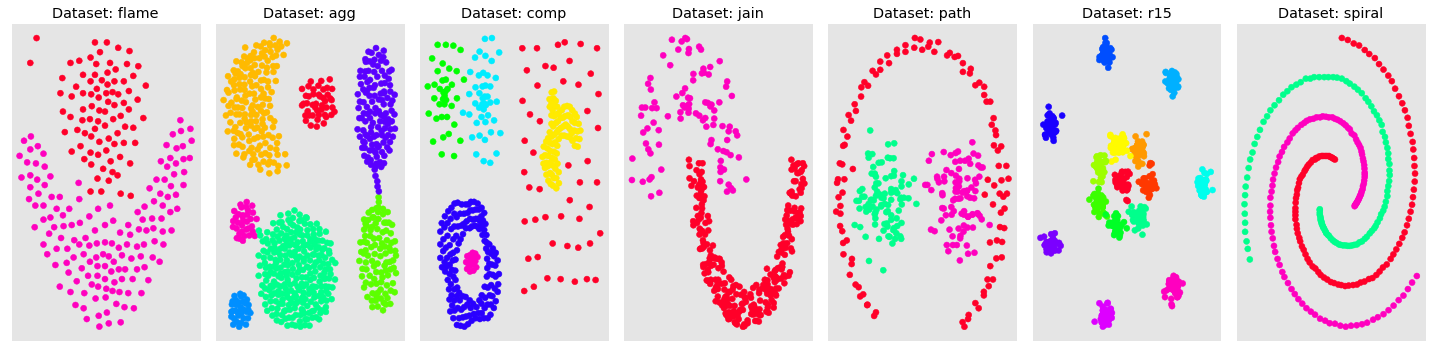

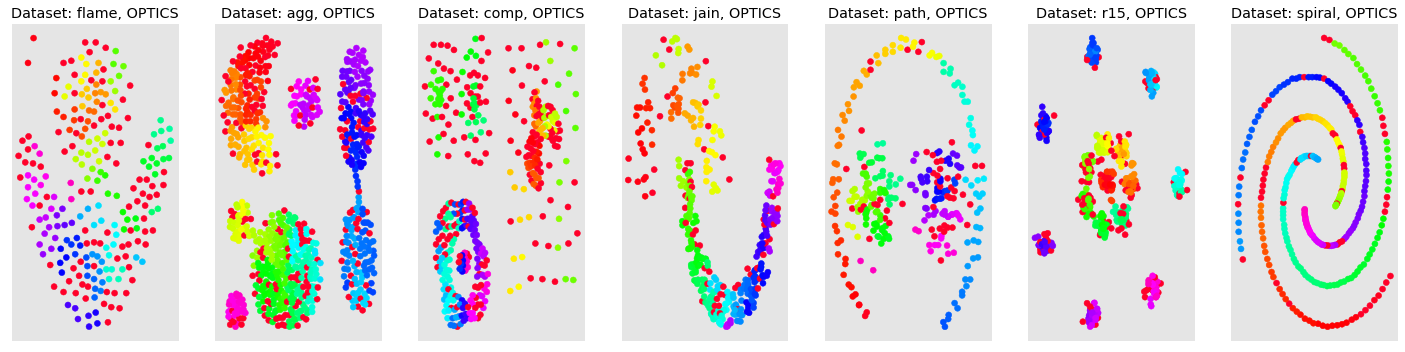

In [106]:
from sklearn.cluster import OPTICS

for cset in clustersets:
    algorithm = OPTICS(n_jobs=-1, max_eps=3, min_samples=2)
    pred_label = algorithm.fit_predict(cset)
    cset['OPTICS'] = pd.Series(pred_label)
    
plot_data(datasets, dataset_names)
plot_cluster(clustersets, dataset_names, 'OPTICS')

## Grid-based Methods

### CLIQUE  (CLustering In QUEst)
CLIQUE partitions each dimension into nonoverlapping intervals, thereby partitioning the entire embedding space of the data objects into cells.
</br>

It uses a density threshold to identify dense cells and sparse ones. A cell is dense if the number of objects mapped to it exceeds the density threshold. A cell that contains n or less points is considered as a outlier as well as its points, if n=0 none of the points are considered outliers

Grid-size
</br>

CLIQUE automatically finds subspaces of the highest dimensionality such that high-density clusters exist in those subspaces.
</br>

It scales linearly with the size of the input and has good scalability as the number of dimensions in the data is increased.

However, obtaining a meaningful clustering is dependent on proper tuning of the grid size and the density threshold

In [137]:
from pyclustering.cluster.clique import clique

for i in range(len(datasets)):
    
    data = datasets[i][['x','y']].values
    
    # create CLIQUE algorithm for processing
    grid_size = 25  # defines amount of cells in grid in each dimension
    density_threshold = 0   # consider each point as non-outlier
    clique_instance = clique(data, grid_size, density_threshold)
    
    clique_instance.process()
    
    clusters = clique_instance.get_clusters()  # allocated clusters
    
    # Create dataframe output to plot using plot functions
    for j in range(0, len(clusters)):
        if j == 0:
            initial = pd.DataFrame([j]*len(clusters[j]),index=clusters[j], columns=['CLIQUE'])
        else:
            initial = pd.concat([initial, pd.DataFrame([j]*len(clusters[j]),index=clusters[j], columns=['CLIQUE'])])
    clustersets[i] = pd.merge(clustersets[i], initial, left_index=True, right_index=True)

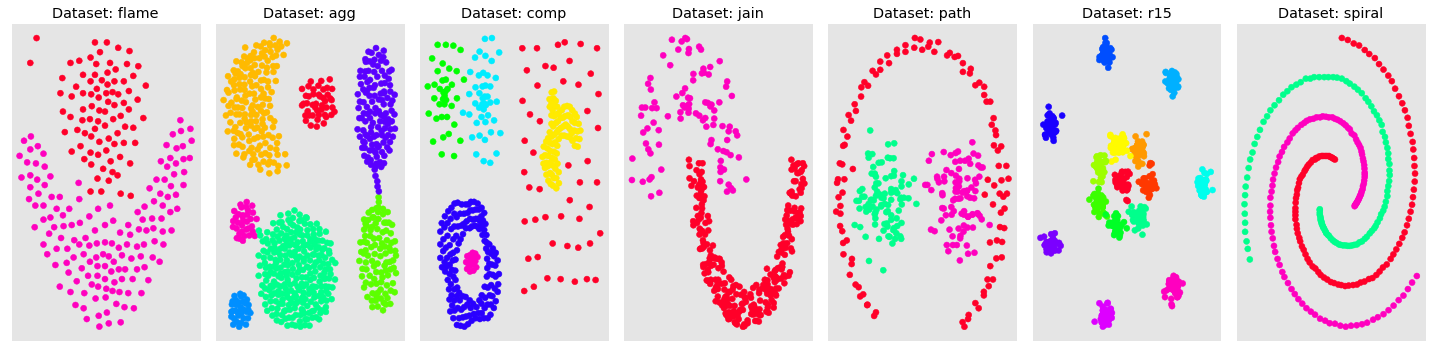

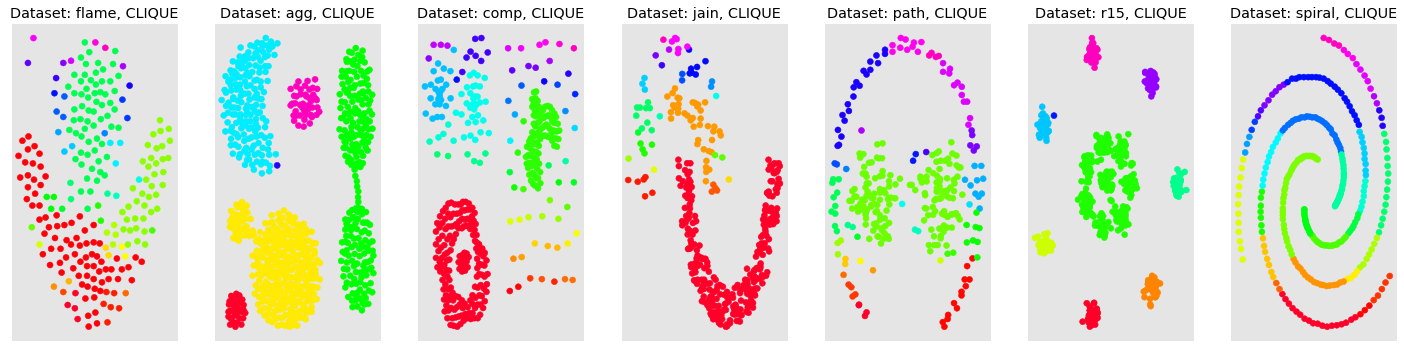

In [138]:
plot_data(datasets, dataset_names)
plot_cluster(clustersets, dataset_names, 'CLIQUE')

# Evaluating Clustering Quality


## Silhouette Coefficient
The value of the silhouette coefficient is between −1 and 1. The smaller the value, the more compact the cluster. When
the silhouette coefficient value of object o approaches 1, the cluster containing o is compact
and o is far away from other clusters, which is the preferable case.
</br>

When the silhouette coefficient value is negative this means that, in expectation, o is closer to the objects in another cluster than to the objects in the same cluster as o. In many cases, this is a bad situation and should be avoided.
</br> 

To measure a cluster’s fitness within a clustering, we can compute the average silhouette coefficient value of all objects in the cluster. To measure the quality of a clustering,
we can use the average silhouette coefficient value of all objects in the data set.

In [180]:
def silhouette_plot(data, clusters: list):
    """
        Plot silhouette
        data - dataset used for clustering
        clusters - list of cluster labels
    """
    from sklearn.metrics import silhouette_samples, silhouette_score
    import matplotlib.cm as cm
    
    # Create a subplot with 1 row and 2 columns
    fig, axis = plt.subplots(1, 2, figsize=(15,5))
    
    data = np.array(data)
    # The 1st subplot is the silhouette plot
    
    # The silhouette coefficient can range from -1, 1
    axis[0].set_xlim([-0.1, 1])
    
    # The (n_clusters+1)*10 is for inserting blank space between silhouette
    axis[0].set_ylim([0, len(data) + (len(set(clusters)) + 1) * 10])

    # The silhouette_score gives the average value for all the samples.
    # This gives a perspective into the density and separation of the formed
    # clusters
    silhouette_avg = silhouette_score(data, clusters)

    # Compute the silhouette scores for each sample
    sample_silhouette_values = silhouette_samples(data, clusters)

    y_lower = 10
    n_clusters = len(set(clusters))
    for i in range(n_clusters):
        # Aggregate the silhouette scores for samples belonging to
        # cluster i, and sort them
        ith_cluster_silhouette_values = \
            sample_silhouette_values[clusters == i]

        ith_cluster_silhouette_values.sort()

        size_cluster_i = ith_cluster_silhouette_values.shape[0]
        y_upper = y_lower + size_cluster_i

        color = cm.nipy_spectral(float(i) / n_clusters)
        axis[0].fill_betweenx(np.arange(y_lower, y_upper),
                          0, ith_cluster_silhouette_values,
                          facecolor=color, edgecolor=color, alpha=0.7)

        # Label the silhouette plots with their cluster numbers at the middle
        axis[0].text(-0.05, y_lower + 0.5 * size_cluster_i, str(i))

        # Compute the new y_lower for next plot
        y_lower = y_upper + 10  # 10 for the 0 samples

    axis[0].set_title("The silhouette plot for the various clusters.")
    axis[0].set_xlabel(f"The silhouette coefficient values - average: {round(silhouette_avg, 3)}")
    axis[0].set_ylabel("Cluster label")

    # The vertical line for average silhouette score of all the values
    axis[0].axvline(x=silhouette_avg, color="red", linestyle="--")

    axis[0].set_yticks([])  # Clear the yaxis labels / ticks
    axis[0].set_xticks([-0.1, 0, 0.2, 0.4, 0.6, 0.8, 1])

    # 2nd Plot showing the actual clusters formed
    colors = cm.nipy_spectral(clusters.astype(float) / n_clusters)
    axis[1].scatter(data[:, 0], data[:, 1], marker='.', s=30, lw=0, alpha=0.7,
                c=colors, edgecolor='k')

    axis[1].set_title("The visualization of the clustered data.")
    axis[1].set_xlabel("Feature space for the 1st feature")
    axis[1].set_ylabel("Feature space for the 2nd feature")

    plt.suptitle((f"Silhouette analysis for {clusters.name} clustering on sample data "
                  "with n_clusters = %d" % n_clusters),
                 fontsize=14, fontweight='bold')

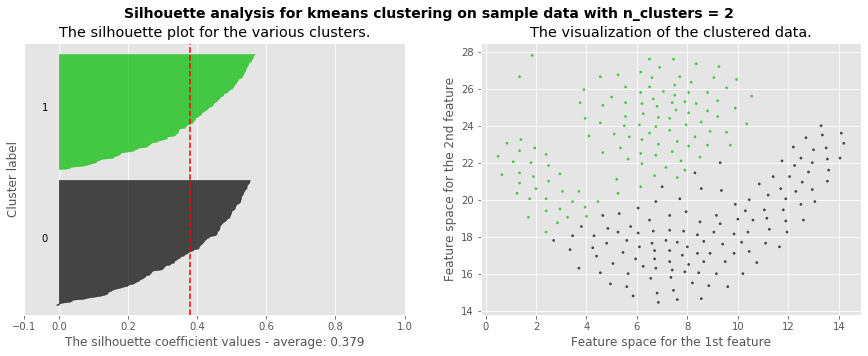

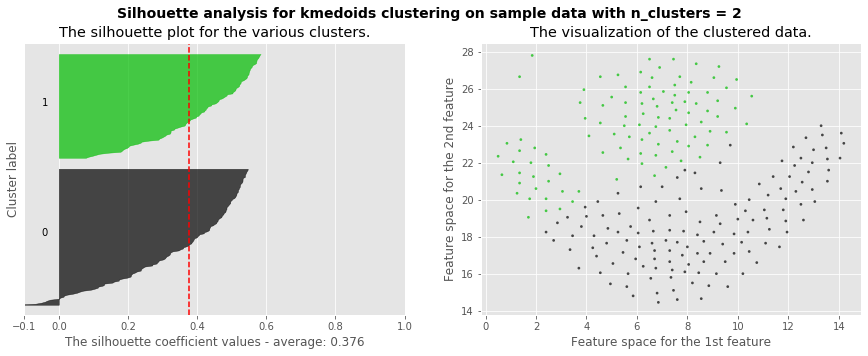

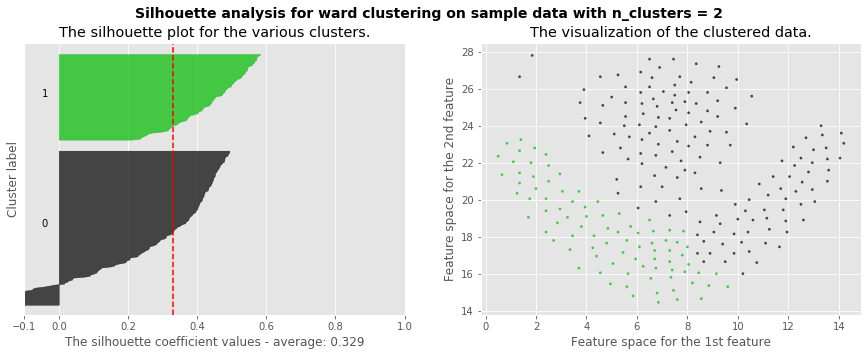

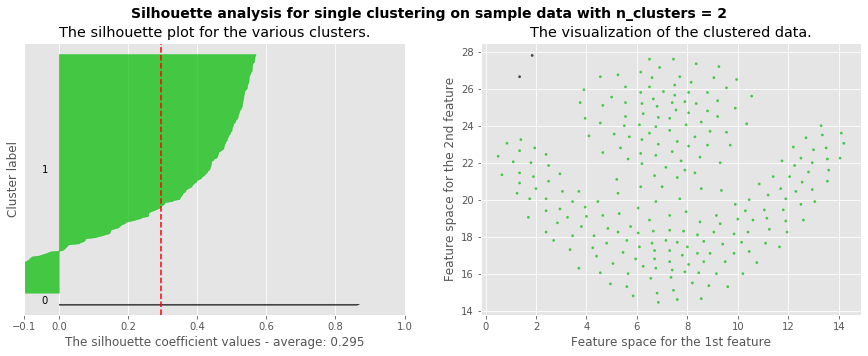

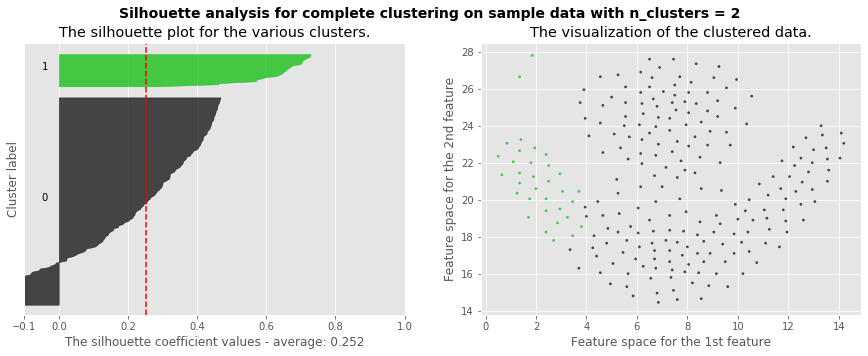

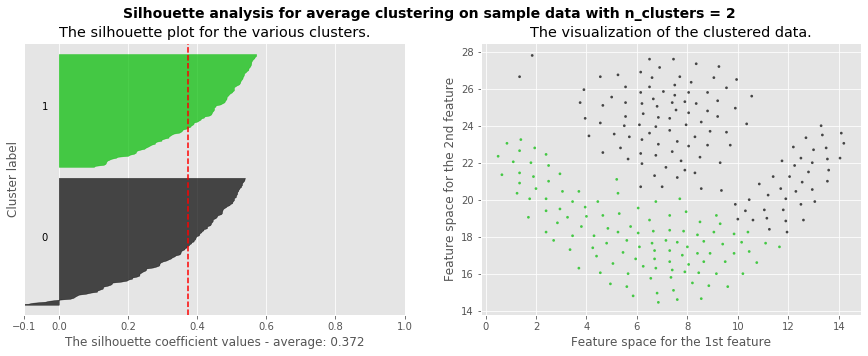

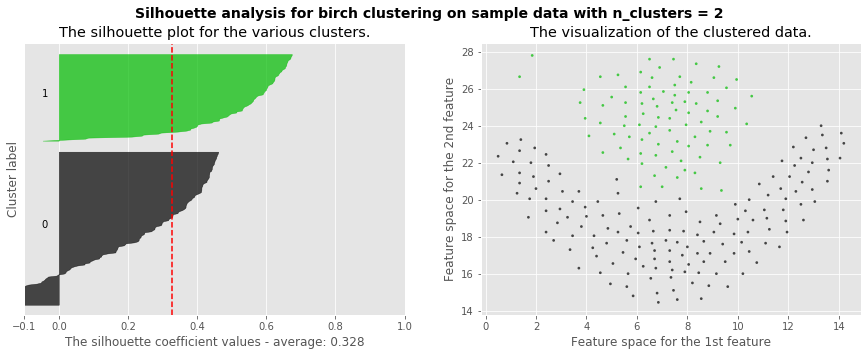

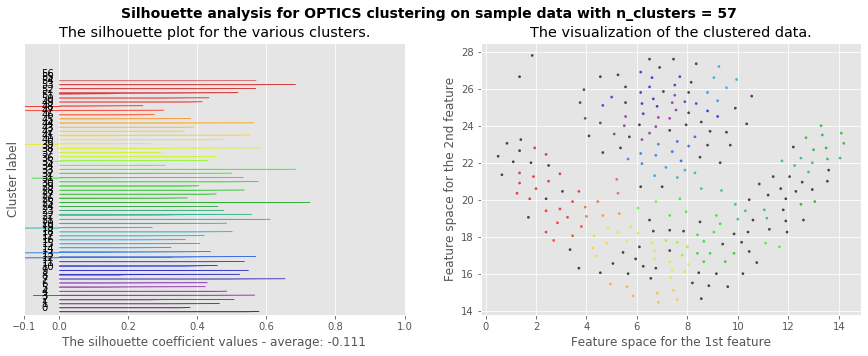

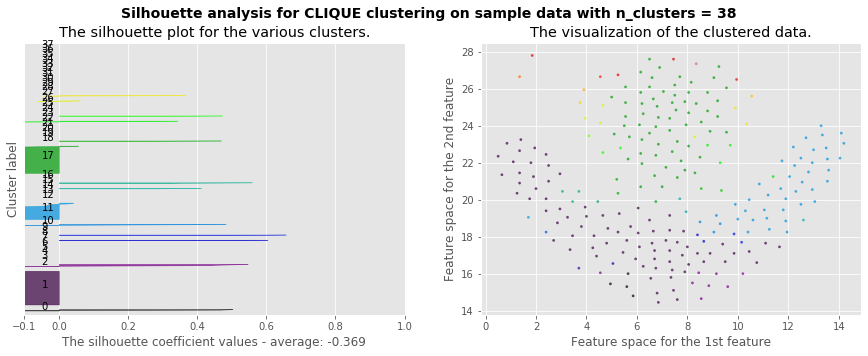

In [181]:
algorithms = ['kmeans', 'kmedoids', 'ward', 'single', 'complete', 'average', 'birch','DBSCAN', 'OPTICS', 'CLIQUE']
for algo in algorithms:
    clusters = clustersets[0][algo]
    if len(set(clusters)) > 1:
        silhouette_plot(clustersets[0][['x','y']], clustersets[0][algo])